In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("..")

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)



In [2]:
import re
from scipy.stats import entropy

df = pd.read_csv("../contrastes/provincias.csv", quotechar="\"", decimal=",")
df = df.set_index("palabra")


fnorm_vars = [c for c in df.columns if re.match(r'fnorm_.*', c)]
cant_palabras = [c for c in df.columns if re.match(r'.*Palabras$', c)]


In [3]:
from iv_helpers import simulated_shuffled_entropy

fn = lambda ws: simulated_shuffled_entropy(ws, len(cant_palabras))

df["entropy"] = df[cant_palabras].apply(entropy, axis=1, raw=True)
df["shuffled_entropy"] = df.cantPalabra.apply(fn)

In [4]:
df["information_value"] = df.FnormMax * (df.shuffled_entropy - df.entropy)
df.sort_values(by="information_value", ascending=False, inplace=True)

palabrasPersonas = [c for c in df.columns if re.match(r'.*PalabrasPersonas', c)]
resumed = df[df.columns.difference(cant_palabras+fnorm_vars + palabrasPersonas)]

resumed.iloc[:500]

,FnormMax,FnormMin,cantPalabra,cantUsuariosTotal,entropy,information_value,maxDif,provinciaFnormMax,provinciaFnormMin,provinciaSinEsaPalabra,shuffled_entropy
palabra,,,,,,,,,,,
rioja,3042.349751,1.113527,22489,1573,0.500515,6726.472221,2732.175349,larioja,formosa,0,2.711462
jujuy,2423.981540,3.231424,17090,1905,0.847711,4245.835514,750.128002,jujuy,buenosaires,0,2.599307
ushuaia,1683.214518,0.513466,14966,1006,0.263759,4201.992791,3278.143172,tierradelfuego,misiones,0,2.760168
gallegos,1013.598553,1.359485,8569,1258,0.681159,2070.310381,745.575627,santacruz,santiago,0,2.723694
comodoro,1046.287766,1.598582,10642,1346,0.700325,2062.758631,654.509846,chubut,salta,0,2.671827
salta,2057.375245,31.706515,25975,5554,1.852849,1820.085338,64.888091,salta,misiones,0,2.737513
formosa,952.761142,1.002856,8418,1265,0.978023,1651.121899,950.048102,formosa,buenosaires,0,2.711009
corrientes,1033.115223,4.001637,12827,2229,1.386989,1521.612411,258.173141,corrientes,lapampa,0,2.859828
catamarca,970.677620,1.518830,9957,1469,1.011637,1418.245156,639.095489,catamarca,tierradelfuego,0,2.472725


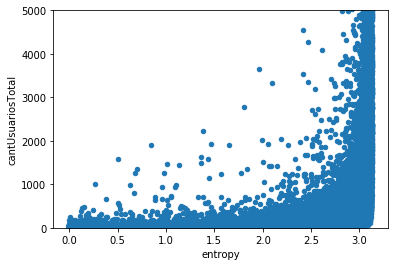

In [5]:
df.plot.scatter(x="entropy", y="cantUsuariosTotal", ylim=[0, 5000])

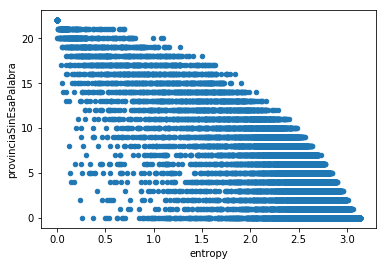

In [6]:
df.plot.scatter(x="entropy", y="provinciaSinEsaPalabra")

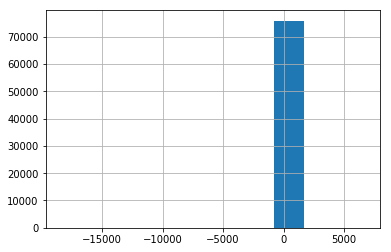

In [7]:
df.information_value.hist()

In [8]:
resumed[df.information_value < 0].iloc[:100]

,FnormMax,FnormMin,cantPalabra,cantUsuariosTotal,entropy,information_value,maxDif,provinciaFnormMax,provinciaFnormMin,provinciaSinEsaPalabra,shuffled_entropy
palabra,,,,,,,,,,,
cru,0.845399,0.106356,50,36,2.637795,-7.508653e-16,7.948780,entrerios,mendoza,4,2.637795
plugin,1.183909,0.112552,71,44,2.640344,-1.850728e-04,10.518728,larioja,chubut,5,2.640188
secuestrando,1.087588,0.106356,57,55,2.785852,-2.117738e-04,10.225933,santiago,mendoza,3,2.785657
repetirlas,0.770199,0.105675,60,57,2.845373,-2.298410e-04,7.288380,misiones,entrerios,3,2.845074
pisco,2.102996,0.108242,172,134,2.728822,-2.852911e-04,19.428582,tierradelfuego,tucuman,1,2.728686
maratonista,1.359485,0.108242,66,51,2.715178,-3.296358e-04,12.559633,santiago,tucuman,4,2.714935
kurz,0.941756,0.099246,43,34,2.562208,-3.504886e-04,9.489070,santacruz,cordoba,7,2.561836
gan,2.025944,0.118667,111,87,2.837093,-4.939327e-04,17.072512,chubut,corrientes,1,2.836850
estanco,0.900420,0.099246,44,37,2.663821,-5.546190e-04,9.072568,chubut,cordoba,5,2.663205
